# Random Forrest regression model

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Importing the recquired packages

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from numpy.random import seed

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
seed(1)

### Loading the data into the dataframe

In [7]:
df_md = pd.read_csv("/content/drive/My Drive/CSV Files/Std_mdb.csv", index_col=[0])

In [8]:
df_md.drop(['sealevel','avgT','maxT','minT','slp','avgRH','PP','avgW','VM','CO2_percapita'], axis = 1 ,inplace=True)

### Splitting the data into training and testing sets

In [9]:
train , test = train_test_split(df_md, test_size = 0.20,random_state = 0)

In [10]:
x_train = train.drop('Std_sealevel', axis=1)
y_train = train['Std_sealevel']

x_test = test.drop('Std_sealevel', axis=1)
y_test = test['Std_sealevel']

### Fitting the model

In [28]:
regressor = RandomForestRegressor(n_estimators= 10, random_state= 1)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

### Utilizing the model to generate predictions

In [29]:
predict = regressor.predict(x_test)

### Calculating the r-squared, adjusted r-squared and the RMSE of the model

In [30]:
r21 = r2_score(y_test,predict).round(3)
print(f"The r-squared value of the new fit is", r21)
p = len(x_train.columns) 
n = len(x_train)
r21_adj = 1 - ((1-r21) * (n-1) / (n-p-1))
rms = sqrt(mean_squared_error(y_test, predict))
print(f"The adjusted r-squared value of the new fit is", r21_adj)
print(f'The RMSE value of the fit is',rms)

The r-squared value of the new fit is 0.959
The adjusted r-squared value of the new fit is 0.9585204678362573
The RMSE value of the fit is 0.0025509794884908442


### Diagnostic Plots 

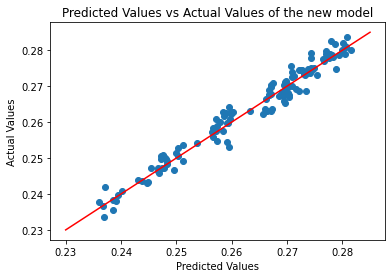

In [14]:
plt.scatter(predict,y_test)
x = np.linspace(0.23,0.285,1000)
plt.plot(x,x, linestyle = 'solid', color = "red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Values vs Actual Values of the new model")
plt.show()

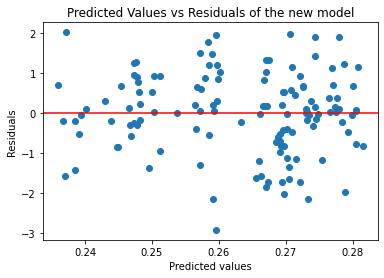

In [15]:
res = y_test - predict
res_stand = (res - res.mean())/res.std()
plt.scatter(predict, res_stand )
plt.axhline(y = 0, color = 'red' )
plt.title("Predicted Values vs Residuals of the new model")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()